#### Idenifying the most violent period in California since 1980 till 2000

In [192]:
import pandas as pd
import calendar as cal
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [217]:
state = 'California'
file_climate = "..\data\\raw_data\Analysis_1\GlobalLandTemperatures\GlobalLandTemperaturesByState.csv"
file_homicide = "..\data\\raw_data\Analysis_1\homicide-reports\homicide_db.csv"
output_folder = "..\data\\processed\Analysis_1\\"
country = 'United States'
start_date = 1980
end_date = 2000
# defining months 
months = {datetime.datetime(2000,i,1).strftime("%b"): i for i in range(1, 13)}

In [194]:
def getMonthWord(dfhc):
    return df_homicide_california.Month.apply(lambda x: x[:3])

In [195]:
def label_point(x, y, val, ax):
    row = pd.concat({'Index': x, 'Incident': y, 'State': val}, axis=1)
    for i, point in row.iterrows():
        ax.text(point['Index'], point['Incident'], str(point['State']))

In [196]:
#reading csv file
df_climate = pd.read_csv(file_climate)

In [197]:
df_climate['DATE_TIME'] = pd.to_datetime(df_climate['dt'])

#Adding month and year column by fetching from DATE_TIME
df_climate['MONTH'] = pd.DatetimeIndex(df_climate['DATE_TIME']).month
df_climate['YEAR'] = pd.DatetimeIndex(df_climate['DATE_TIME']).year
df_climate = df_climate[['AverageTemperature','State','Country','MONTH','YEAR','DATE_TIME']]

In [198]:
#constrining the data set
df_climate = df_climate[df_climate['Country']==country]
df_climate = df_climate[df_climate['YEAR']>=start_date]
df_climate = df_climate[df_climate['YEAR']<=end_date]

In [199]:
df_climate_state = df_climate[df_climate['State']==state]
df_climate_state.head()

,AverageTemperature,State,Country,MONTH,YEAR,DATE_TIME
72630,7.716,California,United States,1,1980,1980-01-01
72631,9.704,California,United States,2,1980,1980-02-01
72632,9.048,California,United States,3,1980,1980-03-01
72633,12.920,California,United States,4,1980,1980-04-01
72634,14.883,California,United States,5,1980,1980-05-01


In [200]:
df_climate_state = df_climate_state.groupby(['MONTH','YEAR','DATE_TIME']).mean()
df_climate_state = df_climate_state.reset_index()
df_climate_state['MONTH'] = df_climate_state.MONTH.astype(str).astype(int)
df_climate_state['MONTH'] = df_climate_state['MONTH'].apply(lambda x: cal.month_abbr[x])
df_climate_state.head()

,MONTH,YEAR,DATE_TIME,AverageTemperature
0,Jan,1980,1980-01-01,7.716
1,Jan,1981,1981-01-01,8.215
2,Jan,1982,1982-01-01,4.731
3,Jan,1983,1983-01-01,6.885
4,Jan,1984,1984-01-01,7.317


In [201]:
df_climate_month_high = df_climate_state
df_climate_month_high['days'] = 1
df_climate_month_high = df_climate_state.groupby('MONTH').sum()
df_climate_month_high = df_climate_month_high.reset_index()
df_climate_month_high['AverageTemperature'] = df_climate_month_high['AverageTemperature']/df_climate_month_high['days']
df_climate_month_high["Month_Index"] = df_climate_month_high["MONTH"].map(months)
df_climate_month_high.sort(ascending=True,columns="Month_Index",inplace=True)
df_climate_month_high = df_climate_month_high[['MONTH','AverageTemperature','Month_Index']]

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [225]:
#writing output to csv file
df_climate_month_high.to_csv(output_folder+'Monthyly_avg_tmp.csv', sep=',', encoding='utf-8')

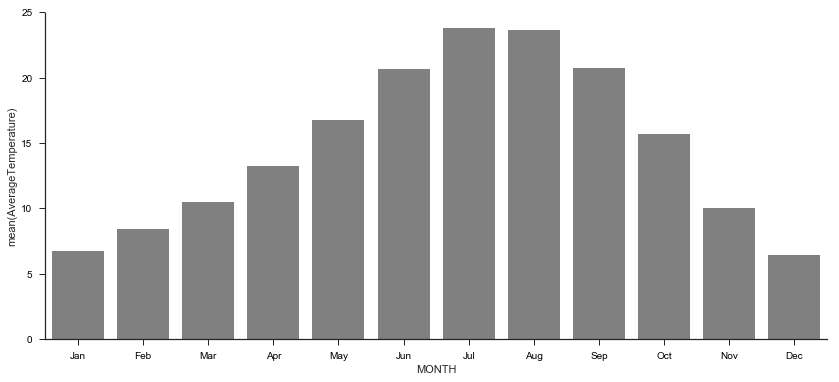

In [202]:
#plotting a bar chart to identify the top the crime perpetuator age

sns.set(style="ticks")
clrs = ['grey' ]# if (x < max(values)) else 'red' for x in values

# This Function takes as input a custom palette
g = sns.barplot(x="MONTH", y='AverageTemperature',data=df_climate_month_high,palette=clrs)

# remove the top and right line in graph
sns.despine()

# Set the size of the graph from here
g.figure.set_size_inches(14,6)

# Set the ticklabel size and color of the graph from here
g.tick_params(labelcolor="black")
plt.show()

##### Note: The analysis shows that during mid year temperature reaches its maximum high in California.

In [203]:
#devising matrix data

df_climate_state = df_climate_state.sort(ascending=True,columns='DATE_TIME')
df_climate_state_data = df_climate_state.pivot("MONTH", "YEAR", "AverageTemperature")
df_climate_state_data = df_climate_state_data.ix[df_climate_state.MONTH.iloc[:12]]
df_climate_state_data.head()

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


YEAR,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
MONTH,,,,,,,,,,,,,,,,,,,,,
Jan,7.716,8.215,4.731,6.885,7.317,5.288,9.210,5.176,5.890,4.906,...,6.365,6.202,5.211,7.542,7.105,7.556,6.950,7.262,7.227,7.667
Feb,9.704,9.042,8.523,8.653,8.098,7.558,9.620,8.193,9.401,6.168,...,10.872,9.780,6.972,6.780,10.907,9.572,8.375,6.764,7.402,8.692
Mar,9.048,9.806,8.776,9.870,11.592,8.562,12.359,9.749,11.256,11.384,...,7.606,10.922,12.006,11.985,9.934,11.228,12.580,10.034,9.068,10.534
Apr,12.920,13.928,11.665,10.433,12.039,14.818,12.947,15.410,13.266,15.806,...,11.824,15.266,13.203,13.574,11.964,14.121,13.389,11.235,11.013,14.629
May,14.883,16.914,16.767,16.547,18.755,16.529,17.022,17.775,16.129,16.680,...,14.668,19.602,17.246,16.621,15.079,17.337,20.068,13.306,16.042,17.993


In [226]:
#writing output to csv file
df_climate_state_data.to_csv(output_folder+'Monthly_temp_1980_20.csv', sep=',', encoding='utf-8')

##### Note: The above data frame depicts the average climate at various months from 1980 to 2000. 

#### Analysing homicide data!

In [204]:
#reading csv file
df_homicide = pd.read_csv(file_homicide)

C:\Users\Rainbow\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [205]:
# Identifying the state with highest murders
df_homicide_max = df_homicide[df_homicide['Year']<=end_date]
df_homicide_max = df_homicide_max[['State','Incident']]
df_homicide_max = df_homicide_max.groupby('State').sum()
df_homicide_max = df_homicide_max[:10]
df_homicide_max.reset_index(level=0,inplace=True)
df_homicide_max.sort(ascending=True,inplace=True, columns='State')
df_homicide_max['Index'] = df_homicide_max.index

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [224]:
#writing output to csv file
df_homicide_max.sort(ascending=False,inplace=False, columns='Incident').to_csv(output_folder+'Murder_rate_states.csv', sep=',', encoding='utf-8')

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


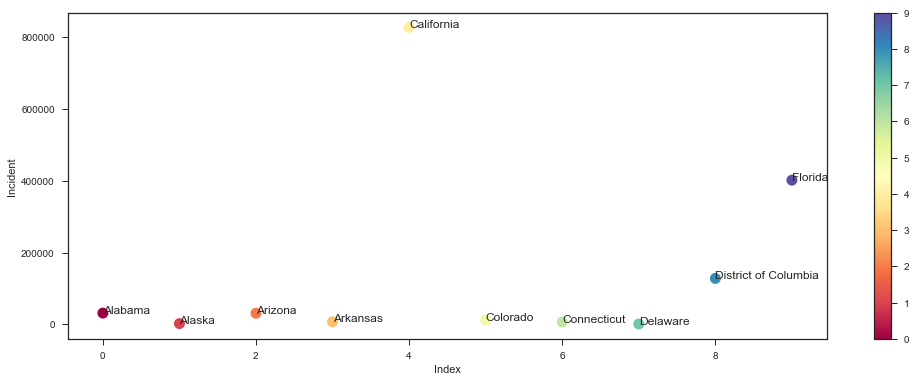

In [206]:
cmap = plt.get_cmap('Spectral')
fig, ax = plt.subplots(figsize=(17,6))

df_homicide_max.plot('Index', 'Incident', kind='scatter', ax=ax, s=120, linewidth=0, 
        c=range(len(df_homicide_max)), colormap=cmap)

for k, point in df_homicide_max.iterrows():
    ax.text(point['Index'], point['Incident'], str(point['State']))

plt.show()

###### Note: The scatter plot depicts that California is one of the state with highest murder rates in US between 1980 to 2000.

In [207]:
# constraining the homicide data set
df_homicide_california = df_homicide[df_homicide['State']==state]
df_homicide_california = df_homicide_california[df_homicide_california['Year']<=end_date]
df_homicide_california.head()

# homicide data set

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
1067,1068,CA00100,Alameda,Sheriff,Alameda,California,1980,April,1,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Knife,0,1,FBI
1068,1069,CA00100,Alameda,Sheriff,Alameda,California,1980,August,1,Murder or Manslaughter,...,Not Hispanic,Male,39,White,Not Hispanic,Son,Handgun,0,0,FBI
1069,1070,CA00100,Alameda,Sheriff,Alameda,California,1980,October,1,Murder or Manslaughter,...,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Fire,0,1,FBI
1070,1071,CA00100,Alameda,Sheriff,Alameda,California,1980,November,1,Murder or Manslaughter,...,Hispanic,Unknown,0,Unknown,Unknown,Unknown,Knife,0,0,FBI
1071,1072,CA00100,Alameda,Sheriff,Alameda,California,1980,November,2,Murder or Manslaughter,...,Not Hispanic,Unknown,0,Unknown,Unknown,Unknown,Knife,0,0,FBI


In [208]:
df_homicide_california = df_homicide_california.groupby(['Month','Year']).sum()
df_homicide_california.head()

Record ID  Incident  Victim Age  Victim Count  Perpetrator Count
Month Year                                                                  
April 1980     688313      3743        8257            20                 87
      1981    6561264      3199        8719            18                 44
      1982   11713558      3250        8019            20                 57
      1983   15680259      3598        8097            18                 40
      1984   20975823      2787        8184            24                 24

In [209]:
df_homicide_california = df_homicide_california.reset_index()

In [210]:
df_homicide_california['Cal_Month'] = getMonthWord(df_homicide_california)
df_homicide_california["Month_Index"] = df_homicide_california["Cal_Month"].map(months)
df_homicide_california.head()

,Month,Year,Record ID,Incident,Victim Age,Victim Count,Perpetrator Count,Cal_Month,Month_Index
0,April,1980,688313,3743,8257,20,87,Apr,4
1,April,1981,6561264,3199,8719,18,44,Apr,4
2,April,1982,11713558,3250,8019,20,57,Apr,4
3,April,1983,15680259,3598,8097,18,40,Apr,4
4,April,1984,20975823,2787,8184,24,24,Apr,4


In [211]:
df_homicide_california['Year'] = df_homicide_california.Year.astype(str).astype(int)
df_homicide_california['Month_Index'] = df_homicide_california.Month_Index.astype(str).astype(int)
df_homicide_california['full_date'] = datetime.date(year=1980, month=1,day=1)
for i, row in df_homicide_california.iterrows():
    df_homicide_california.set_value(i,'full_date',datetime.date(year=row['Year'], month=row['Month_Index'],day=1))
    
#trimming the data columns    
df_homicide_california = df_homicide_california[['full_date','Year','Cal_Month','Month_Index','Victim Count','Incident']]
df_homicide_california.head()

#homicide data set in california from 1980 to 2000 grouped by date

,full_date,Year,Cal_Month,Month_Index,Victim Count,Incident
0,1980-04-01,1980,Apr,4,20,3743
1,1981-04-01,1981,Apr,4,18,3199
2,1982-04-01,1982,Apr,4,20,3250
3,1983-04-01,1983,Apr,4,18,3598
4,1984-04-01,1984,Apr,4,24,2787


In [212]:
# sorting the dataset in ascending order on full date
df_homicide_california.sort(columns='full_date',ascending=True,inplace=True)

C:\Users\Rainbow\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [213]:
df_homicide_california_plot = df_homicide_california.pivot("Cal_Month", "Year", "Incident")
df_homicide_california_plot = df_homicide_california_plot.ix[df_homicide_california.Cal_Month.iloc[:12]]
df_homicide_california_plot.head()

#death count in each month from 1980 to 2000

Year,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000
Cal_Month,,,,,,,,,,,,,,,,,,,,,
Jan,2992,2994,3578,3864,3093,2455,2367,3075,2804,4819,...,3616,3850,5318,3099,3026,4161,1420,1224,1008,1156
Feb,2526,3808,1628,1867,1772,3483,2547,3062,2046,2942,...,2192,4432,3925,2891,2192,3329,1717,908,709,593
Mar,2346,3056,4154,2790,2139,3466,4456,3191,2671,2703,...,3426,4429,4964,3401,2721,1598,2311,1159,1020,616
Apr,3743,3199,3250,3598,2787,2317,2965,3888,2247,2969,...,4631,6223,4033,3398,2483,2603,1601,625,591,1324
May,2854,3313,3337,3969,2917,2588,2976,2685,2351,2967,...,4294,4327,5340,2992,2703,2777,1151,722,941,1758


In [221]:
#writing output to csv file
df_homicide_california_plot.to_csv(output_folder+'Homicide_california.csv', sep=',', encoding='utf-8')

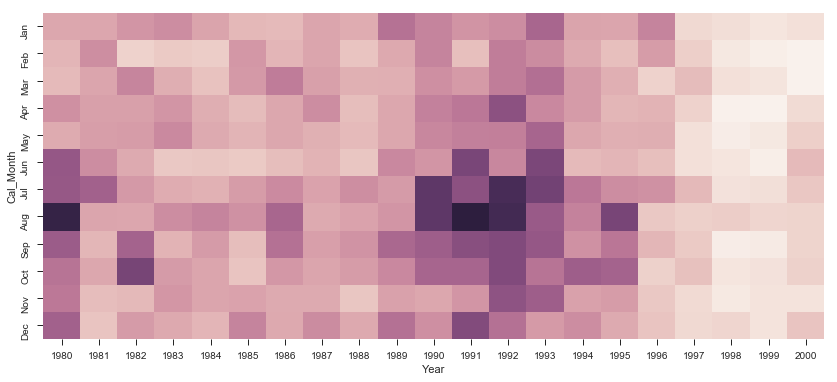

In [214]:
# Creating heat map of California homicide dataset
fig, ax = plt.subplots(figsize=(14,6))
sns.heatmap(df_homicide_california_plot,cbar=False,ax=ax);
#linewidths=0.1, 
#plt.yticks(np.arange(1, len(df_climate_state_data.index), 1), df_climate_state_data.index)
#plt.xticks(np.arange(5, len(df_climate_state_data.columns), 2), df_climate_state_data.columns)
plt.show()

# Heat map of homicide data in California from 1980 to 2000

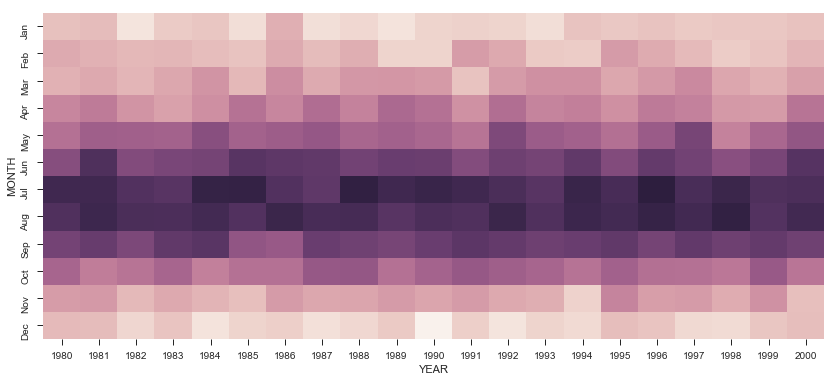

In [215]:
# Creating heat map of California weather and temperature dataset
fig, ax = plt.subplots(figsize=(14,6))
sns.heatmap(df_climate_state_data,cbar=False,ax=ax)
#linewidths=0.1, 
#plt.yticks(np.arange(1, len(df_climate_state_data.index), 1), df_climate_state_data.index)
#plt.xticks(np.arange(5, len(df_climate_state_data.columns), 2), df_climate_state_data.columns)

plt.show()

# Heat map of weather and temperature in California from 1980 to 2000

##### Note: The analysis proves the myth that whenever the temperature of a region goes high the people residing in the area starts to behave abnormally. Inorder to prevent such unfortunate events proper regulations/rules/laws should be kept in place(till 1995).

From the generated graph we can infer that when the temperature in California goes high the average murder rate also shoots up. This could be probaby due to the following reasons.
1. There are more number of people on the streets since it's unbearable to be indoors if you don't have AC.
2. More frequent uncontrolled rage responses, when the surrounding climate is extremely high.
3. No gun laws till 1995 in California.
